In [403]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 정면

## 1.이미지 불러오기

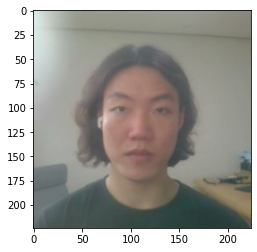

In [478]:
my_image_path = '/content/drive/MyDrive/Aiffel/LMS/Exp3/f1.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)        
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출, 랜드마크 검출

### 얼굴 검출

rectangles[[(66, 76) (155, 166)]]


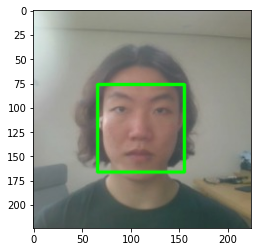

In [479]:
detector_hog = dlib.get_frontal_face_detector()
# 얼굴을 찾기
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴을 출력
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 랜드마크 검출

[[(70, 101), (70, 113), (71, 125), (72, 137), (75, 148), (81, 158), (88, 167), (97, 173), (107, 175), (118, 174), (128, 168), (136, 161), (143, 152), (148, 141), (152, 130), (155, 118), (156, 106), (77, 89), (82, 85), (90, 85), (97, 87), (104, 91), (119, 92), (126, 88), (133, 87), (141, 88), (147, 92), (111, 102), (110, 110), (110, 118), (109, 126), (101, 132), (105, 133), (109, 134), (113, 133), (118, 133), (84, 102), (88, 100), (94, 101), (98, 104), (93, 105), (88, 104), (123, 105), (128, 102), (134, 102), (138, 104), (134, 106), (128, 106), (94, 149), (100, 145), (105, 142), (109, 144), (113, 143), (118, 145), (123, 150), (118, 154), (113, 156), (108, 157), (104, 156), (99, 154), (97, 149), (105, 148), (109, 148), (113, 148), (121, 150), (113, 149), (109, 150), (105, 149)]]


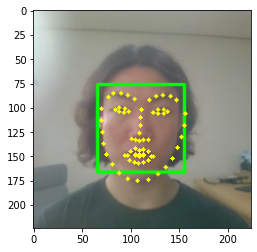

In [480]:
model_path = '/content/drive/MyDrive/Aiffel/LMS/Exp3/shape_predictor_68_face_landmarks .dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장한다.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(list_landmarks)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 적용 위치 확인

In [481]:
# 랜드마크 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # 코의 인덱스는 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(109, 126)
(x,y) : (109,126)
(w,h) : (90,90)


In [482]:
# 스티커 불러오기, 사이즈 조절
sticker_path = '/content/drive/MyDrive/Aiffel/LMS/Exp3/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(90, 90, 3)


고양이 스티커 위치 잡기.

1. 스티커의 정중앙을 코에 맞춰야 한다.
2. 얼굴 영역 박스의 정중앙은 코이다. 
3. 스티커의 크기와 박스크기가 같으니 박스의 시작점과 스티커의 시작점을 맞춰준다.

In [483]:
refined_x = dlib_rect.left()
refined_y = dlib_rect.top()
print('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (66,76)


In [484]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (66,76)


## 4. 스티커 적용하기

`np.where()`에 인자를 넣는 순서가 중요하다. 반대로 넣게되면 스티커의 투명도가 뒤집혀서 하얀 배경에 코랑 수염만 뚫려있는 이미지가 나온다.



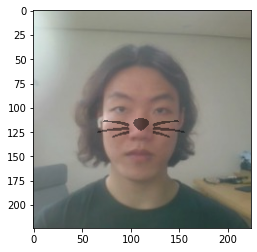

In [485]:
sticker_area = img_rgb[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_rgb[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 0.5, 0)

plt.imshow(img_rgb)
plt.show()

# 측면

## 이미지 불러오기

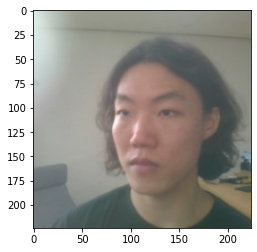

In [486]:
my_image_path = '/content/drive/MyDrive/Aiffel/LMS/Exp3/f2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)        
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출, 랜드마크 검출

### 얼굴 검출

rectangles[[(67, 80) (175, 187)]]


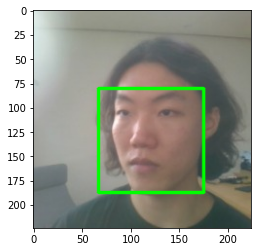

In [487]:
detector_hog = dlib.get_frontal_face_detector()
# 얼굴을 찾기
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴을 출력
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 랜드마크 검출

[[(82, 109), (81, 120), (82, 132), (85, 144), (89, 156), (93, 167), (97, 178), (104, 186), (115, 189), (127, 188), (141, 183), (152, 175), (163, 165), (171, 152), (175, 137), (178, 122), (179, 107), (83, 90), (87, 87), (93, 87), (99, 89), (104, 93), (121, 92), (129, 87), (139, 85), (148, 86), (157, 91), (112, 105), (110, 114), (108, 123), (106, 132), (102, 139), (105, 140), (109, 141), (115, 141), (120, 140), (88, 106), (91, 103), (97, 104), (102, 108), (97, 109), (91, 109), (129, 108), (135, 103), (141, 103), (148, 106), (142, 109), (135, 109), (100, 158), (103, 153), (107, 151), (111, 153), (115, 152), (122, 155), (131, 160), (123, 165), (116, 167), (111, 167), (107, 166), (103, 163), (102, 158), (107, 157), (111, 158), (115, 158), (128, 160), (115, 159), (111, 159), (107, 158)]]


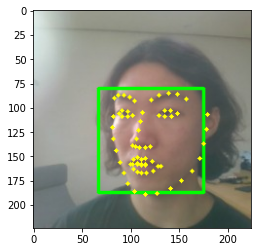

In [488]:
model_path = '/content/drive/MyDrive/Aiffel/LMS/Exp3/shape_predictor_68_face_landmarks .dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장한다.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(list_landmarks)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용 위치 확인

In [489]:
# 랜드마크 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # 코의 인덱스는 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(106, 132)
(x,y) : (106,132)
(w,h) : (109,109)


In [490]:
# 스티커 불러오기, 사이즈 조절
sticker_path = '/content/drive/MyDrive/Aiffel/LMS/Exp3/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(109, 109, 3)


In [491]:
refined_x = dlib_rect.left()
refined_y = dlib_rect.top()
print('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (67,80)


In [492]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (67,80)


## 스티커 적용하기

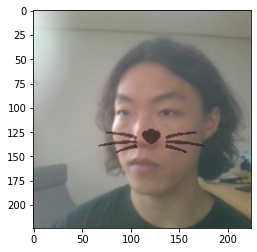

In [493]:
sticker_area = img_rgb[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_rgb[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 0.5, 0)

plt.imshow(img_rgb)
plt.show()

# 마무리

- 생각해볼 점

1. 얼굴 각도에 따라 스티커의 각도도 변해야 한다.
3. 실시간 영상으로 스티커를 입히려면 실행속도가 중요하다.
4. 스티커가 제자리에 있어야 하기 때문에 정확도가 중요하다.

위의 문제점을 해결하기 위해서는 얼굴검출과 랜드마크 검출 후에 얼굴의 방향이 바뀌어도 마스크처럼 얼굴을 따라다녀야 한다. 그리고 그 마스크 위에 이미지를 덫씌운다.
